In [1]:
import os
from shutil import copyfile
path='../input/lung-ct/CT_COVID/CT_COVID/'
outpath = './'
if (not os.path.exists(outpath+'LUNG_COVID/')):
    os.mkdir(outpath+'LUNG_COVID/')
    os.mkdir(outpath+'LUNG_COVID/CT_COVID/')
    os.mkdir(outpath+'LUNG_COVID/CT_NonCOVID/')
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png"
    src =path+ filename 
    dst =outpath+'LUNG_COVID/CT_COVID/'+ dst 
        
    # rename() function will 
    # rename all the files 
    copyfile(src, dst)
print("Covid Positive cases: ", count)

path='../input/lung-ct/CT_NonCOVID/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =outpath+'LUNG_COVID/CT_NonCOVID/'+ dst 
        
    # rename() function will 
    # rename all the files 
    copyfile(src, dst)

print("Covid Negative cases: ", count)

Covid Positive cases:  348
Covid Negative cases:  396


In [2]:
base_dir = './LUNG_COVID/data'
if not os.path.exists(base_dir): os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):os.mkdir(test_dir)

In [4]:
original_dataset_dir_covid = './LUNG_COVID/CT_COVID/'
original_dataset_dir_non_covid = './LUNG_COVID/CT_NonCOVID/'

import shutil
fnames = ['covid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_dir, fname)
    print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

./LUNG_COVID/CT_COVID/covid-0.png ./LUNG_COVID/data/train/covid-0.png
./LUNG_COVID/CT_COVID/covid-1.png ./LUNG_COVID/data/train/covid-1.png
./LUNG_COVID/CT_COVID/covid-2.png ./LUNG_COVID/data/train/covid-2.png
./LUNG_COVID/CT_COVID/covid-3.png ./LUNG_COVID/data/train/covid-3.png
./LUNG_COVID/CT_COVID/covid-4.png ./LUNG_COVID/data/train/covid-4.png
./LUNG_COVID/CT_COVID/covid-5.png ./LUNG_COVID/data/train/covid-5.png
./LUNG_COVID/CT_COVID/covid-6.png ./LUNG_COVID/data/train/covid-6.png
./LUNG_COVID/CT_COVID/covid-7.png ./LUNG_COVID/data/train/covid-7.png
./LUNG_COVID/CT_COVID/covid-8.png ./LUNG_COVID/data/train/covid-8.png
./LUNG_COVID/CT_COVID/covid-9.png ./LUNG_COVID/data/train/covid-9.png
./LUNG_COVID/CT_COVID/covid-10.png ./LUNG_COVID/data/train/covid-10.png
./LUNG_COVID/CT_COVID/covid-11.png ./LUNG_COVID/data/train/covid-11.png
./LUNG_COVID/CT_COVID/covid-12.png ./LUNG_COVID/data/train/covid-12.png
./LUNG_COVID/CT_COVID/covid-13.png ./LUNG_COVID/data/train/covid-13.png
./LUNG_COVID

In [5]:
fnames = ['noncovid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [7]:
def label_img(img):
    word_label = img.split('-')[0]
    if word_label == 'covid': return 1
    elif word_label == 'noncovid': return 0

In [8]:

def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [9]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(500, 224, 224, 3)
(100, 224, 224, 3)
(96, 224, 224, 3)


In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

2021-09-15 02:25:16.310321: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [11]:
base_model = InceptionV3(weights='imagenet', include_top=False)
base_model.summary()

2021-09-15 02:25:20.189920: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-15 02:25:20.193403: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-15 02:25:20.236866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-15 02:25:20.237521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-15 02:25:20.237591: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-15 02:25:20.269340: I tensorflow/stream_executor/platform/def

87916544/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________

In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='incep_model.h5', save_best_only=True),
]

In [16]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=100, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

2021-09-15 02:25:25.340309: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-15 02:25:25.351586: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000200000 Hz


Epoch 1/100


2021-09-15 02:25:29.370783: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-15 02:25:30.141195: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-15 02:25:30.163091: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


25/25 [==============================] - 13s 108ms/step - loss: 2.9362 - acc: 0.4952 - val_loss: 0.6577 - val_acc: 0.6000
Epoch 2/100
25/25 [==============================] - 1s 44ms/step - loss: 0.5743 - acc: 0.7065 - val_loss: 0.5927 - val_acc: 0.6900
Epoch 3/100
25/25 [==============================] - 1s 45ms/step - loss: 0.4902 - acc: 0.7426 - val_loss: 0.5534 - val_acc: 0.7900
Epoch 4/100
25/25 [==============================] - 1s 50ms/step - loss: 0.3955 - acc: 0.8496 - val_loss: 0.5547 - val_acc: 0.7200
Epoch 5/100
25/25 [==============================] - 1s 45ms/step - loss: 0.3494 - acc: 0.8558 - val_loss: 0.5633 - val_acc: 0.8200
Epoch 6/100
25/25 [==============================] - 1s 44ms/step - loss: 0.3074 - acc: 0.8779 - val_loss: 0.5345 - val_acc: 0.7700
Epoch 7/100
25/25 [==============================] - 1s 44ms/step - loss: 0.2610 - acc: 0.9164 - val_loss: 0.5733 - val_acc: 0.7600
Epoch 8/100
25/25 [==============================] - 1s 45ms/step - loss: 0.2097 - acc

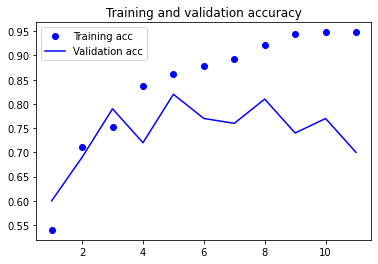

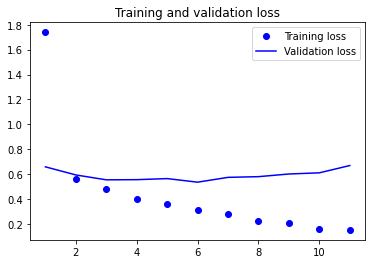

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:

from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)


Train Accuracy:	 0.9480000138282776
Val Accuracy:	 0.699999988079071
Test Accuracy:	 0.7395833333333334
Precision:	 0.7804878048780488
Recall:		 0.6666666666666666
F1 Score:	 0.7191011235955055
AUC:		 0.7395833333333333
